In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional


print(os.getcwd())

/home/jmmcaro/PythonDir/PythonEnv/QoX/code


In [2]:
df_init = pd.read_csv('../csv/S2_Rural.csv', sep=';')
print(df_init.head())
print(list(df_init.columns))

   time  10_validity  10_timeliness  10_recall  10_quantity  10_precision  \
0   500            1              1        1.0     1.000000      0.981154   
1  1000            1              1        1.0     0.994118      1.000000   
2  1500            1              1        1.0     0.905882      0.973087   
3  2000            1              1        1.0     0.864706      0.973087   
4  2500            1              1        1.0     0.911765      1.000000   

   10_detail  10_accuracy    10_QoI  10_ThBps  ...  19_ThBps    19_PDR  \
0          1            1  0.981154  1.000000  ...  1.000000  0.823600   
1          1            1  0.994118  1.000000  ...  0.888959  0.831604   
2          1            1  0.881503  0.931880  ...  1.000000  0.901376   
3          1            1  0.841434  0.847894  ...  0.855022  0.826415   
4          1            1  0.911765  0.855889  ...  0.970100  0.782809   

   19_Jitter  19_GWAv  19_Delay    19_QoE    19_QoD  19_thruthfullness  \
0   1.000000      

In [3]:
cols_GWAv = pd.DataFrame()
cols_Jitter = pd.DataFrame()
cols_Delay = pd.DataFrame()
cols_ThBps = pd.DataFrame()
cols_quantity = pd.DataFrame()
cols_PDR = pd.DataFrame()
cols_recall = pd.DataFrame()
cols_QoE = pd.DataFrame()


cols_GWAv = df_init[['10_GWAv','11_GWAv','12_GWAv','13_GWAv','14_GWAv','15_GWAv','16_GWAv','17_GWAv','18_GWAv','19_GWAv']]
cols_Jitter = df_init[['10_Jitter','11_Jitter','12_Jitter','13_Jitter','14_Jitter','15_Jitter','16_Jitter','17_Jitter','18_Jitter','19_Jitter']]
cols_Delay = df_init[['10_Delay','11_Delay','12_Delay','13_Delay','14_Delay','15_Delay','16_Delay','17_Delay','18_Delay','19_Delay']]
cols_ThBps = df_init[['10_ThBps','11_ThBps','12_ThBps','13_ThBps','14_ThBps','15_ThBps','16_ThBps','17_ThBps','18_ThBps','19_ThBps']]
cols_quantity = df_init[['10_quantity','11_quantity','12_quantity','13_quantity','14_quantity','15_quantity','16_quantity','17_quantity','18_quantity','19_quantity']]
cols_PDR = df_init[['10_PDR','11_PDR','12_PDR','13_PDR','14_PDR','15_PDR','16_PDR','17_PDR','18_PDR','19_PDR']]
cols_recall = df_init[['10_recall','11_recall','12_recall','13_recall','14_recall','15_recall','16_recall','17_recall','18_recall','19_recall']]
cols_QoE = df_init[['10_QoE','11_QoE','12_QoE','13_QoE','14_QoE','15_QoE','16_QoE','17_QoE','18_QoE','19_QoE']]

cols2 = ['GWAv', 'Jitter', 'Delay','ThBps','quantity','PDR','recall','Decision']

df2 = pd.DataFrame(columns=cols2)


In [4]:
aux0 = pd.Series(cols_GWAv['10_GWAv'])
aux1 = pd.Series(cols_GWAv['11_GWAv'])
aux2 = pd.Series(cols_GWAv['12_GWAv'])
aux3 = pd.Series(cols_GWAv['13_GWAv'])
aux4 = pd.Series(cols_GWAv['14_GWAv'])
aux5 = pd.Series(cols_GWAv['15_GWAv'])
aux6 = pd.Series(cols_GWAv['16_GWAv'])
aux7 = pd.Series(cols_GWAv['17_GWAv'])
aux8 = pd.Series(cols_GWAv['18_GWAv'])
aux9 = pd.Series(cols_GWAv['19_GWAv'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['GWAv'] = pd.Series(aux)

[1.         1.         1.         ... 1.         1.         0.99999999]


In [5]:
aux0 = pd.Series(cols_Jitter['10_Jitter'])
aux1 = pd.Series(cols_Jitter['11_Jitter'])
aux2 = pd.Series(cols_Jitter['12_Jitter'])
aux3 = pd.Series(cols_Jitter['13_Jitter'])
aux4 = pd.Series(cols_Jitter['14_Jitter'])
aux5 = pd.Series(cols_Jitter['15_Jitter'])
aux6 = pd.Series(cols_Jitter['16_Jitter'])
aux7 = pd.Series(cols_Jitter['17_Jitter'])
aux8 = pd.Series(cols_Jitter['18_Jitter'])
aux9 = pd.Series(cols_Jitter['19_Jitter'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Jitter'] = pd.Series(aux)

[1.         1.         0.946581   ... 0.83244406 0.90703392 0.8578095 ]


In [6]:
aux0 = pd.Series(cols_Delay['10_Delay'])
aux1 = pd.Series(cols_Delay['11_Delay'])
aux2 = pd.Series(cols_Delay['12_Delay'])
aux3 = pd.Series(cols_Delay['13_Delay'])
aux4 = pd.Series(cols_Delay['14_Delay'])
aux5 = pd.Series(cols_Delay['15_Delay'])
aux6 = pd.Series(cols_Delay['16_Delay'])
aux7 = pd.Series(cols_Delay['17_Delay'])
aux8 = pd.Series(cols_Delay['18_Delay'])
aux9 = pd.Series(cols_Delay['19_Delay'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Delay'] = pd.Series(aux)

[1.         1.         0.97974004 ... 0.77732748 0.78389232 0.86609526]


In [7]:
aux0 = pd.Series(cols_ThBps['10_ThBps'])
aux1 = pd.Series(cols_ThBps['11_ThBps'])
aux2 = pd.Series(cols_ThBps['12_ThBps'])
aux3 = pd.Series(cols_ThBps['13_ThBps'])
aux4 = pd.Series(cols_ThBps['14_ThBps'])
aux5 = pd.Series(cols_ThBps['15_ThBps'])
aux6 = pd.Series(cols_ThBps['16_ThBps'])
aux7 = pd.Series(cols_ThBps['17_ThBps'])
aux8 = pd.Series(cols_ThBps['18_ThBps'])
aux9 = pd.Series(cols_ThBps['19_ThBps'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['ThBps'] = pd.Series(aux)

[1.         1.         0.93188    ... 0.79775875 0.7410003  0.90856501]


In [8]:
aux0 = pd.Series(cols_quantity['10_quantity'])
aux1 = pd.Series(cols_quantity['11_quantity'])
aux2 = pd.Series(cols_quantity['12_quantity'])
aux3 = pd.Series(cols_quantity['13_quantity'])
aux4 = pd.Series(cols_quantity['14_quantity'])
aux5 = pd.Series(cols_quantity['15_quantity'])
aux6 = pd.Series(cols_quantity['16_quantity'])
aux7 = pd.Series(cols_quantity['17_quantity'])
aux8 = pd.Series(cols_quantity['18_quantity'])
aux9 = pd.Series(cols_quantity['19_quantity'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['quantity'] = pd.Series(aux)

[1.         0.99411765 0.90588235 ... 0.82653061 0.81122449 0.89285714]


In [9]:
aux0 = pd.Series(cols_PDR['10_PDR'])
aux1 = pd.Series(cols_PDR['11_PDR'])
aux2 = pd.Series(cols_PDR['12_PDR'])
aux3 = pd.Series(cols_PDR['13_PDR'])
aux4 = pd.Series(cols_PDR['14_PDR'])
aux5 = pd.Series(cols_PDR['15_PDR'])
aux6 = pd.Series(cols_PDR['16_PDR'])
aux7 = pd.Series(cols_PDR['17_PDR'])
aux8 = pd.Series(cols_PDR['18_PDR'])
aux9 = pd.Series(cols_PDR['19_PDR'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['PDR'] = pd.Series(aux)

[0.86158281 0.90750225 0.87762803 ... 0.84483352 0.86711531 0.83079134]


In [10]:
aux0 = pd.Series(cols_recall['10_recall'])
aux1 = pd.Series(cols_recall['11_recall'])
aux2 = pd.Series(cols_recall['12_recall'])
aux3 = pd.Series(cols_recall['13_recall'])
aux4 = pd.Series(cols_recall['14_recall'])
aux5 = pd.Series(cols_recall['15_recall'])
aux6 = pd.Series(cols_recall['16_recall'])
aux7 = pd.Series(cols_recall['17_recall'])
aux8 = pd.Series(cols_recall['18_recall'])
aux9 = pd.Series(cols_recall['19_recall'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['recall'] = pd.Series(aux)

[1.   1.   1.   ... 1.   1.   0.96]


In [11]:
aux0 = pd.Series(cols_QoE['10_QoE'])
aux1 = pd.Series(cols_QoE['11_QoE'])
aux2 = pd.Series(cols_QoE['12_QoE'])
aux3 = pd.Series(cols_QoE['13_QoE'])
aux4 = pd.Series(cols_QoE['14_QoE'])
aux5 = pd.Series(cols_QoE['15_QoE'])
aux6 = pd.Series(cols_QoE['16_QoE'])
aux7 = pd.Series(cols_QoE['17_QoE'])
aux8 = pd.Series(cols_QoE['18_QoE'])
aux9 = pd.Series(cols_QoE['19_QoE'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Decision'] = pd.Series(aux)

[0.86158281 0.90750224 0.75847123 ... 0.43611577 0.45685163 0.56079544]


In [12]:
print(df2)

       GWAv    Jitter     Delay     ThBps  quantity       PDR  recall  \
0       1.0  1.000000  1.000000  1.000000  1.000000  0.861583    1.00   
1       1.0  1.000000  1.000000  1.000000  0.994118  0.907502    1.00   
2       1.0  0.946581  0.979740  0.931880  0.905882  0.877628    1.00   
3       1.0  0.972999  0.943664  0.847894  0.864706  0.850449    1.00   
4       1.0  0.981547  0.897210  0.855889  0.911765  0.832732    1.00   
...     ...       ...       ...       ...       ...       ...     ...   
14395   1.0  0.819694  0.742565  0.705068  0.765306  0.803373    0.96   
14396   1.0  0.902494  0.917663  0.846650  0.821429  0.794394    1.00   
14397   1.0  0.832444  0.777327  0.797759  0.826531  0.844834    1.00   
14398   1.0  0.907034  0.783892  0.741000  0.811224  0.867115    1.00   
14399   1.0  0.857809  0.866095  0.908565  0.892857  0.830791    0.96   

       Decision  
0      0.861583  
1      0.907502  
2      0.758471  
3      0.662094  
4      0.627665  
...         ...

[6912, 520, 488, 1535, 3582, 3811, 8279, 9863, 434, 9195]
[2, 1, 5, 4, 4, 3, 2, 9, 2, 10]
-----------------------------
[11438, 6924, 5574, 4552, 2547, 3527, 12509, 5514, 1674, 1519]
[13, 20, 18, 16, 13, 17, 19, 14, 10, 12]
-----------------------------
[13223, 711, 11955, 7527, 8785]
[394, 249, 383, 376, 335]
-----------------------------


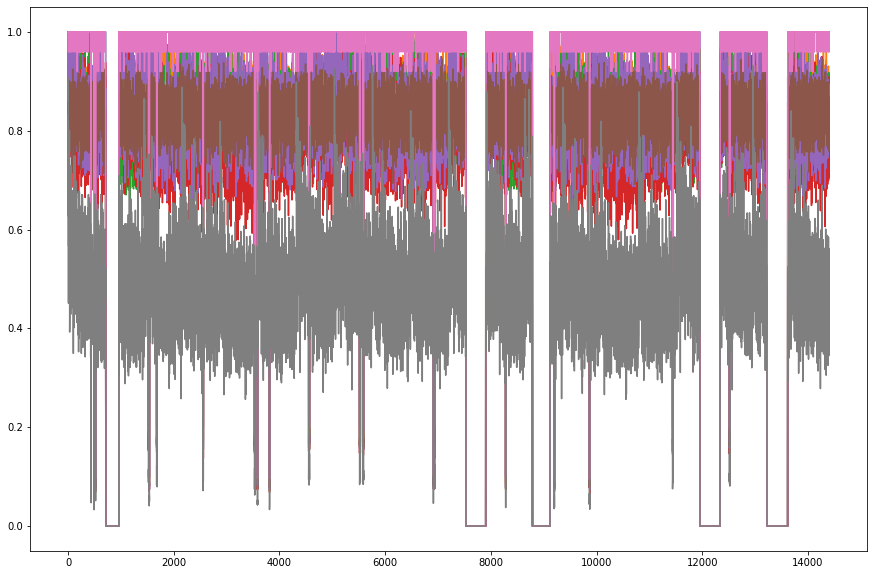

In [13]:
random.seed(42)

lent = df2['GWAv'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df2[init1[i]:init1[i]+leng1[i]] = df2[init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df2[init2[i]:init2[i]+leng2[i]] = df2[init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df2[init3[i]:init3[i]+leng3[i]] = df2[init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(df2)
plt.show()

In [14]:
from chefboost import Chefboost as chef
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score


In [15]:
y_testt = df2['Decision']
for i in range(0,df2.shape[0]):
    if(df2['Decision'][i] >=0.8 and df2['Decision'][i] <=1):
        df2['Decision'][i] = 5
    if(df2['Decision'][i] <0.8 and df2['Decision'][i]>=0.6):
        df2['Decision'][i] = 4   
    if(df2['Decision'][i] <0.6 and df2['Decision'][i]>=0.4):
        df2['Decision'][i] = 3
    if(df2['Decision'][i] <0.4 and df2['Decision'][i]>=0.2):
        df2['Decision'][i] = 2
    if(df2['Decision'][i] <0.2 and df2['Decision'][i]>=0):
        df2['Decision'][i] = 1  
        

In [16]:
print(df2.columns)
df_decision = df2['Decision']
df2 = df2.drop(['Decision'],axis=1)
print(df2)




Index(['GWAv', 'Jitter', 'Delay', 'ThBps', 'quantity', 'PDR', 'recall',
       'Decision'],
      dtype='object')
       GWAv    Jitter     Delay     ThBps  quantity       PDR  recall
0       1.0  1.000000  1.000000  1.000000  1.000000  0.861583    1.00
1       1.0  1.000000  1.000000  1.000000  0.994118  0.907502    1.00
2       1.0  0.946581  0.979740  0.931880  0.905882  0.877628    1.00
3       1.0  0.972999  0.943664  0.847894  0.864706  0.850449    1.00
4       1.0  0.981547  0.897210  0.855889  0.911765  0.832732    1.00
...     ...       ...       ...       ...       ...       ...     ...
14395   1.0  0.819694  0.742565  0.705068  0.765306  0.803373    0.96
14396   1.0  0.902494  0.917663  0.846650  0.821429  0.794394    1.00
14397   1.0  0.832444  0.777327  0.797759  0.826531  0.844834    1.00
14398   1.0  0.907034  0.783892  0.741000  0.811224  0.867115    1.00
14399   1.0  0.857809  0.866095  0.908565  0.892857  0.830791    0.96

[14400 rows x 7 columns]


In [17]:
df2_train, df2_test, dec_train, dec_test = train_test_split(df2, y_testt, test_size=0.25, shuffle=False, random_state=42)


In [18]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf_train = clf.fit(df2_train, dec_train)
dec_test = dec_test.to_numpy();
yhat = clf_train.predict(df2_test)
print(yhat)


[5. 5. 5. ... 3. 3. 3.]


In [19]:
print(len(yhat))
print(len(dec_test))

yhat2 = yhat/max(yhat)
print(yhat2)

comp = {'yhat': yhat, 'y_test': dec_test}
df_comp = pd.DataFrame(data=comp)
print(df_comp)


3600
3600
[1.  1.  1.  ... 0.6 0.6 0.6]
      yhat  y_test
0      5.0     5.0
1      5.0     5.0
2      5.0     5.0
3      4.0     4.0
4      5.0     5.0
...    ...     ...
3595   2.0     2.0
3596   3.0     3.0
3597   3.0     3.0
3598   3.0     3.0
3599   3.0     3.0

[3600 rows x 2 columns]


In [20]:
min = 0
count = 0;
notif_paper = []
notif2_paper = []

th = 0.5


for i in range(0,len(yhat)):
    #print([res_QoE['yhat'][i], res_QoE['y_test'][i]])
    if (i==0):
        notif_paper.append(0)
        notif2_paper.append(0)
    else:
        if(yhat[i] < dec_train[i-1]*th):
            notif_paper.append(1)
        else:
            notif_paper.append(0)
        
        if(dec_train[i] < dec_train[i-1]*th or dec_train[i] <=2):
            notif2_paper.append(1)
        else:
            notif2_paper.append(0)    



In [21]:
df_QoI = pd.DataFrame()
df_QoE = pd.DataFrame()
df_QoD = pd.DataFrame()
cols = ['QoE', 'QoI', 'QoD']
df = pd.DataFrame(columns=cols)
print(df)

Empty DataFrame
Columns: [QoE, QoI, QoD]
Index: []


In [22]:
df_QoI = df_init[['10_QoI','11_QoI','12_QoI','13_QoI','14_QoI','15_QoI','16_QoI','17_QoI','18_QoI','19_QoI']]
df_QoE = df_init[['10_QoE','11_QoE','12_QoE','13_QoE','14_QoE','15_QoE','16_QoE','17_QoE','18_QoE','19_QoE']]
df_QoD = df_init[['10_QoD','11_QoD','12_QoD','13_QoD','14_QoD','15_QoD','16_QoD','17_QoD','18_QoD','19_QoD']]

In [23]:
print(df_QoE)

       10_QoE    11_QoE    12_QoE    13_QoE    14_QoE    15_QoE    16_QoE  \
0    0.861583  0.879560  0.865184  0.888110  0.819160  0.878616  0.898742   
1    0.907502  0.846081  0.785157  0.828856  0.574951  0.845081  0.771039   
2    0.758471  0.764439  0.677423  0.740695  0.581733  0.813059  0.801418   
3    0.662094  0.728379  0.775893  0.800857  0.630893  0.660434  0.657650   
4    0.627665  0.873829  0.852168  0.813943  0.437784  0.800199  0.735216   
..        ...       ...       ...       ...       ...       ...       ...   
715  0.431180  0.378034  0.346438  0.498083  0.360114  0.390321  0.533765   
716  0.431584  0.407974  0.530209  0.620009  0.382912  0.358104  0.502316   
717  0.553483  0.475378  0.377159  0.446962  0.390657  0.524784  0.518091   
718  0.448299  0.343174  0.534052  0.408276  0.541430  0.406827  0.601980   
719  0.396302  0.407028  0.470023  0.421734  0.469747  0.416140  0.482499   

       17_QoE    18_QoE    19_QoE  
0    0.924349  0.931402  0.823600  
1  

In [24]:
aux0 = pd.Series(df_QoE['10_QoE'])
aux1 = pd.Series(df_QoE['11_QoE'])
aux2 = pd.Series(df_QoE['12_QoE'])
aux3 = pd.Series(df_QoE['13_QoE'])
aux4 = pd.Series(df_QoE['14_QoE'])
aux5 = pd.Series(df_QoE['15_QoE'])
aux6 = pd.Series(df_QoE['16_QoE'])
aux7 = pd.Series(df_QoE['17_QoE'])
aux8 = pd.Series(df_QoE['18_QoE'])
aux9 = pd.Series(df_QoE['19_QoE'])
aux10 = pd.Series(df_QoE['10_QoE'])
aux11 = pd.Series(df_QoE['11_QoE'])
aux12 = pd.Series(df_QoE['12_QoE'])
aux13 = pd.Series(df_QoE['13_QoE'])
aux14 = pd.Series(df_QoE['14_QoE'])
aux15 = pd.Series(df_QoE['15_QoE'])
aux16 = pd.Series(df_QoE['16_QoE'])
aux17 = pd.Series(df_QoE['17_QoE'])
aux18 = pd.Series(df_QoE['18_QoE'])
aux19 = pd.Series(df_QoE['19_QoE'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoE'] = pd.Series(aux)




[0.86158281 0.90750224 0.75847123 ... 0.43611577 0.45685163 0.56079544]


In [25]:
print(df)

            QoE  QoI  QoD
0      0.861583  NaN  NaN
1      0.907502  NaN  NaN
2      0.758471  NaN  NaN
3      0.662094  NaN  NaN
4      0.627665  NaN  NaN
...         ...  ...  ...
14395  0.344773  NaN  NaN
14396  0.557016  NaN  NaN
14397  0.436116  NaN  NaN
14398  0.456852  NaN  NaN
14399  0.560795  NaN  NaN

[14400 rows x 3 columns]


In [26]:
aux0 = pd.Series(df_QoI['10_QoI'])
aux1 = pd.Series(df_QoI['11_QoI'])
aux2 = pd.Series(df_QoI['12_QoI'])
aux3 = pd.Series(df_QoI['13_QoI'])
aux4 = pd.Series(df_QoI['14_QoI'])
aux5 = pd.Series(df_QoI['15_QoI'])
aux6 = pd.Series(df_QoI['16_QoI'])
aux7 = pd.Series(df_QoI['17_QoI'])
aux8 = pd.Series(df_QoI['18_QoI'])
aux9 = pd.Series(df_QoI['19_QoI'])
aux10 = pd.Series(df_QoI['10_QoI'])
aux11 = pd.Series(df_QoI['11_QoI'])
aux12 = pd.Series(df_QoI['12_QoI'])
aux13 = pd.Series(df_QoI['13_QoI'])
aux14 = pd.Series(df_QoI['14_QoI'])
aux15 = pd.Series(df_QoI['15_QoI'])
aux16 = pd.Series(df_QoI['16_QoI'])
aux17 = pd.Series(df_QoI['17_QoI'])
aux18 = pd.Series(df_QoI['18_QoI'])
aux19 = pd.Series(df_QoI['19_QoI'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoI'] = pd.Series(aux)


[0.98115385 0.99411765 0.88150278 ... 0.81095369 0.7893924  0.83407499]


In [27]:
print(df)

            QoE       QoI  QoD
0      0.861583  0.981154  NaN
1      0.907502  0.994118  NaN
2      0.758471  0.881503  NaN
3      0.662094  0.841434  NaN
4      0.627665  0.911765  NaN
...         ...       ...  ...
14395  0.344773  0.720848  NaN
14396  0.557016  0.799322  NaN
14397  0.436116  0.810954  NaN
14398  0.456852  0.789392  NaN
14399  0.560795  0.834075  NaN

[14400 rows x 3 columns]


In [28]:
aux0 = pd.Series(df_QoD['10_QoD'])
aux1 = pd.Series(df_QoD['11_QoD'])
aux2 = pd.Series(df_QoD['12_QoD'])
aux3 = pd.Series(df_QoD['13_QoD'])
aux4 = pd.Series(df_QoD['14_QoD'])
aux5 = pd.Series(df_QoD['15_QoD'])
aux6 = pd.Series(df_QoD['16_QoD'])
aux7 = pd.Series(df_QoD['17_QoD'])
aux8 = pd.Series(df_QoD['18_QoD'])
aux9 = pd.Series(df_QoD['19_QoD'])
aux10 = pd.Series(df_QoD['10_QoD'])
aux11 = pd.Series(df_QoD['11_QoD'])
aux12 = pd.Series(df_QoD['12_QoD'])
aux13 = pd.Series(df_QoD['13_QoD'])
aux14 = pd.Series(df_QoD['14_QoD'])
aux15 = pd.Series(df_QoD['15_QoD'])
aux16 = pd.Series(df_QoD['16_QoD'])
aux17 = pd.Series(df_QoD['17_QoD'])
aux18 = pd.Series(df_QoD['18_QoD'])
aux19 = pd.Series(df_QoD['19_QoD'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoD'] = pd.Series(aux)


[0.08836238 0.41498649 0.51132355 ... 0.57053041 0.53435826 0.54837743]


In [29]:
print(df)
df_bup = df

            QoE       QoI       QoD
0      0.861583  0.981154  0.088362
1      0.907502  0.994118  0.414986
2      0.758471  0.881503  0.511324
3      0.662094  0.841434  0.552595
4      0.627665  0.911765  0.540741
...         ...       ...       ...
14395  0.344773  0.720848  0.528148
14396  0.557016  0.799322  0.526532
14397  0.436116  0.810954  0.570530
14398  0.456852  0.789392  0.534358
14399  0.560795  0.834075  0.548377

[14400 rows x 3 columns]


In [30]:
var_x = np.linspace(0.0, df.shape[0]-1, num=df.shape[0])
print(var_x)

[0.0000e+00 1.0000e+00 2.0000e+00 ... 1.4397e+04 1.4398e+04 1.4399e+04]


In [31]:
print(os.getcwd())

/home/jmmcaro/PythonDir/PythonEnv/QoX/code


[180, 1881, 4650, 13232, 1928, 5096, 14015, 12181, 10638, 585]
[5, 7, 8, 5, 2, 5, 6, 1, 2, 8]
-----------------------------
[2339, 11476, 937, 527, 2821, 5253, 4126, 5841, 12699, 11881]
[19, 11, 12, 14, 12, 13, 16, 11, 19, 16]
-----------------------------
[12307, 5382, 5193, 12843, 6336]
[363, 248, 410, 245, 210]
-----------------------------


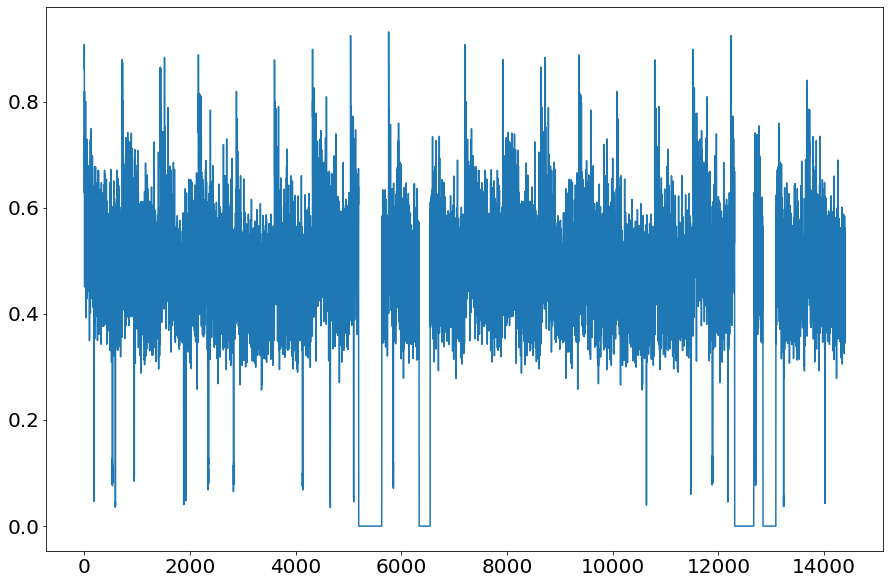

In [32]:
random.seed(45)

lent = df['QoE'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoE'][init1[i]:init1[i]+leng1[i]] = df['QoE'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoE'][init2[i]:init2[i]+leng2[i]] = df['QoE'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoE'][init3[i]:init3[i]+leng3[i]] = df['QoE'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoE'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[8856, 6313, 6355, 8249, 6647, 5213, 11781, 7026, 8752, 12664]
[2, 4, 3, 5, 2, 3, 5, 2, 6, 8]
-----------------------------
[13728, 3665, 859, 6203, 3796, 1451, 8224, 10556, 12238, 7015]
[20, 10, 20, 14, 10, 13, 18, 10, 19, 17]
-----------------------------
[5007, 5411, 13589, 136, 1755]
[299, 316, 305, 410, 287]
-----------------------------


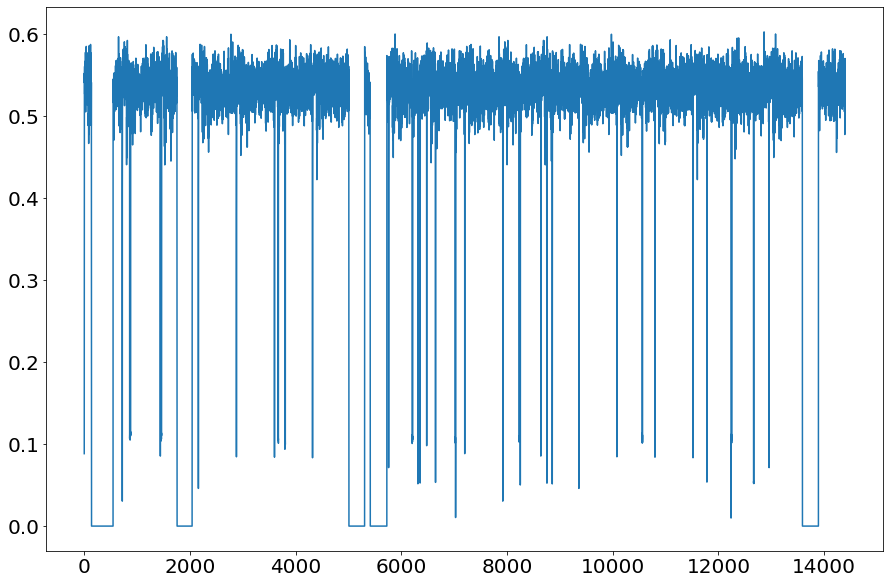

In [33]:
random.seed(55)

lent = df['QoD'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoD'][init1[i]:init1[i]+leng1[i]] = df['QoD'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoD'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoD'][init2[i]:init2[i]+leng2[i]] = df['QoD'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoD'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoD'][init3[i]:init3[i]+leng3[i]] = df['QoD'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoD'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoD'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[5552, 13531, 10477, 7151, 3695, 1179, 9190, 7653, 4326, 3224]
[7, 5, 5, 9, 4, 8, 8, 9, 8, 9]
-----------------------------
[13498, 2043, 2245, 11307, 5743, 6021, 9452, 10688, 6004, 10119]
[20, 17, 19, 10, 14, 11, 12, 18, 12, 20]
-----------------------------
[818, 11462, 2505, 12440, 340]
[318, 316, 403, 430, 443]
-----------------------------


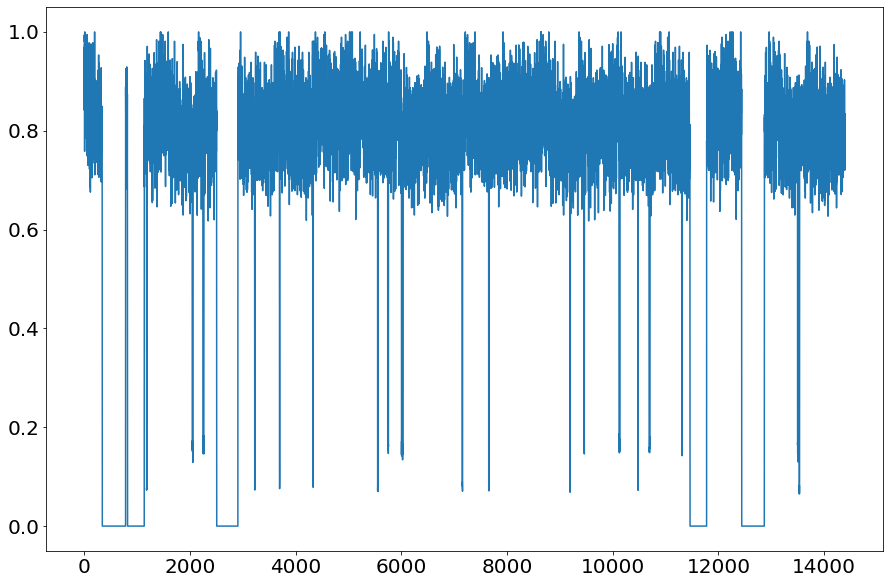

In [34]:
random.seed(65)

lent = df['QoI'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoI'][init1[i]:init1[i]+leng1[i]] = df['QoI'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoI'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoI'][init2[i]:init2[i]+leng2[i]] = df['QoI'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoI'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoI'][init3[i]:init3[i]+leng3[i]] = df['QoI'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoI'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoI'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[1372, 12409, 4115, 4498, 8135, 11796, 14111, 10886, 5696, 9939]
[8, 10, 7, 8, 1, 9, 8, 6, 2, 6]
-----------------------------
[11077, 3254, 2157, 3219, 14372, 2351, 4950, 8072, 9782, 2760]
[20, 17, 14, 16, 10, 16, 18, 19, 20, 17]
-----------------------------
[910, 4427, 5306, 3189, 949]
[437, 209, 357, 230, 235]
-----------------------------


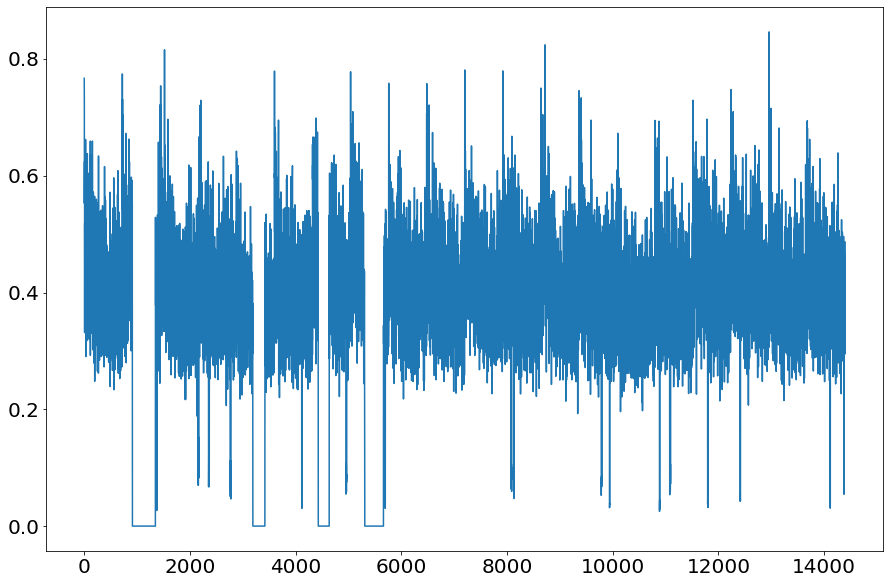

In [35]:
random.seed(75)

df['QC'] = pd.read_csv('../csv/S2_Rural_QC.csv')
lent = df['QC'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QC'][init1[i]:init1[i]+leng1[i]] = df['QC'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QC'][init2[i]:init2[i]+leng2[i]] = df['QC'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QC'][init3[i]:init3[i]+leng3[i]] = df['QC'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QC'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

In [36]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
 


In [37]:
from sklearn.model_selection import train_test_split

# choose a number of time steps
n_steps = 5
# split into samples
X_QoE, y_QoE = split_sequence(df['QoE'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X[i], y[i])
    


In [38]:
n_features = 1
X_QoE = X_QoE.reshape((X_QoE.shape[0], X_QoE.shape[1], n_features))
#print(X_QoE)
# define model
model_QoE = Sequential()
model_QoE.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoE.add(Dense(1))
model_QoE.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoE, X_test_QoE, y_train_QoE, y_test_QoE = train_test_split(X_QoE, y_QoE, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoE = model_QoE.fit(X_train_QoE, y_train_QoE, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoE = model_QoE.predict(X_test_QoE, verbose=0)
print([yhat_QoE,y_test_QoE])

Epoch 1/150
2/2 [==============================] - 0s 23ms/step - loss: 0.2079
Epoch 2/150
2/2 [==============================] - 0s 18ms/step - loss: 0.1847
Epoch 3/150
2/2 [==============================] - 0s 15ms/step - loss: 0.1645
Epoch 4/150
2/2 [==============================] - 0s 14ms/step - loss: 0.1467
Epoch 5/150
2/2 [==============================] - 0s 16ms/step - loss: 0.1313
Epoch 6/150
2/2 [==============================] - 0s 22ms/step - loss: 0.1177
Epoch 7/150
2/2 [==============================] - 0s 22ms/step - loss: 0.1056
Epoch 8/150
2/2 [==============================] - 0s 14ms/step - loss: 0.0951
Epoch 9/150
2/2 [==============================] - 0s 13ms/step - loss: 0.0860
Epoch 10/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0780
Epoch 11/150
2/2 [==============================] - 0s 14ms/step - loss: 0.0710
Epoch 12/150
2/2 [==============================] - 0s 15ms/step - loss: 0.0648
Epoch 13/150
2/2 [==============================]

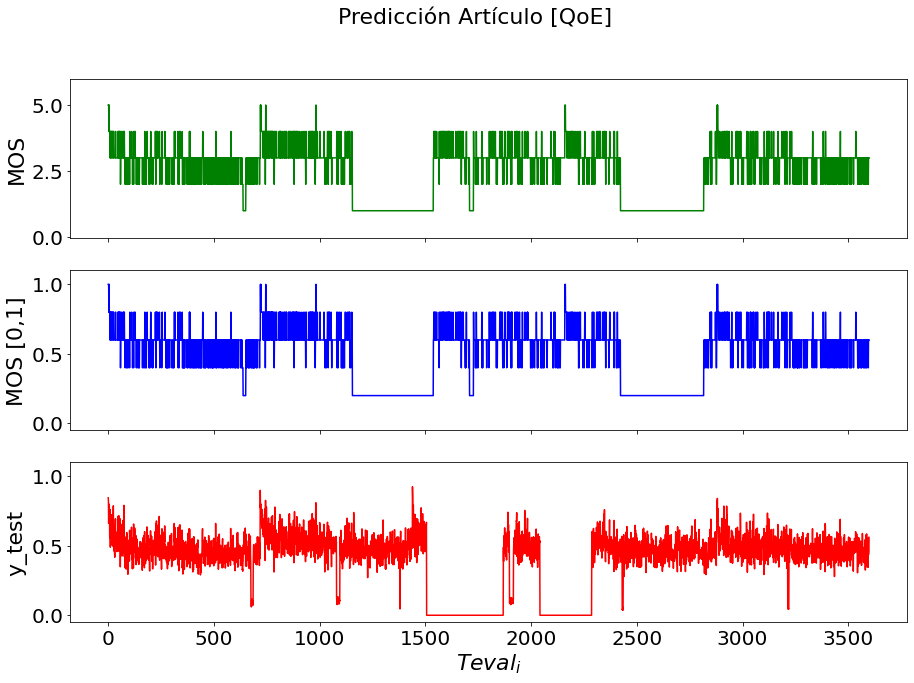

In [39]:
fig2, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción Artículo [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax1.plot(yhat,c='g')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('MOS', fontsize=22)
ax1.set_ylim([-0.05,6])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(yhat2,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('MOS [0,1]', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoE,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-paperEstimationQoE.png', format='png',bbox_inches='tight')

plt.show()

In [40]:
yhat2 = list(yhat2)
yhat2.pop()

0.6

In [41]:
print('R2 Score [QoE paper]: '+str(r2_score(y_test_QoE, yhat2)))

R2 Score [QoE paper]: -1.3385499961737581


dict_keys(['loss'])


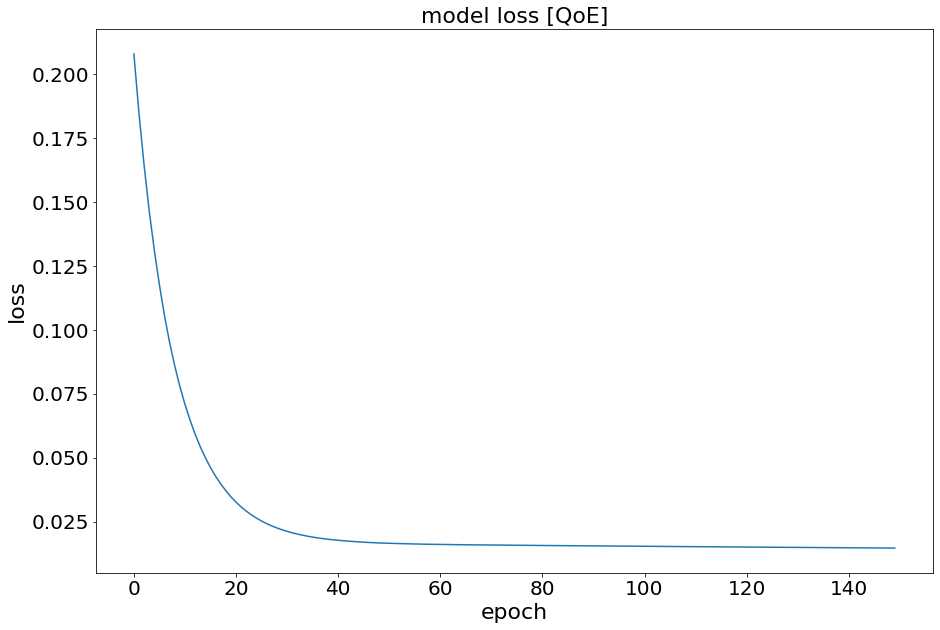

In [42]:
# list all data in history
print(history_QoE.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoE.history['loss'])
plt.title('model loss [QoE]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-model_QoE_loss-mse.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

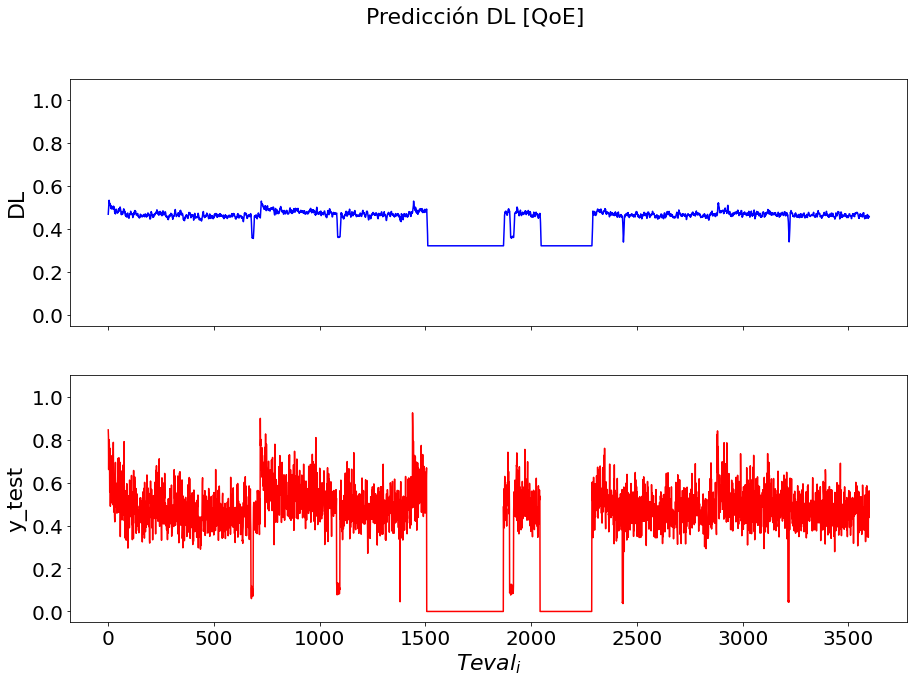

In [43]:
fig2, ((ax2), (ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción DL [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax2.plot(yhat_QoE,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoE,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-modelEstimationQoE.png', format='png',bbox_inches='tight')

plt.show()

In [44]:
print('R2 Score [QoE]: '+str(r2_score(y_test_QoE, yhat_QoE)))

R2 Score [QoE]: 0.38851017124784193


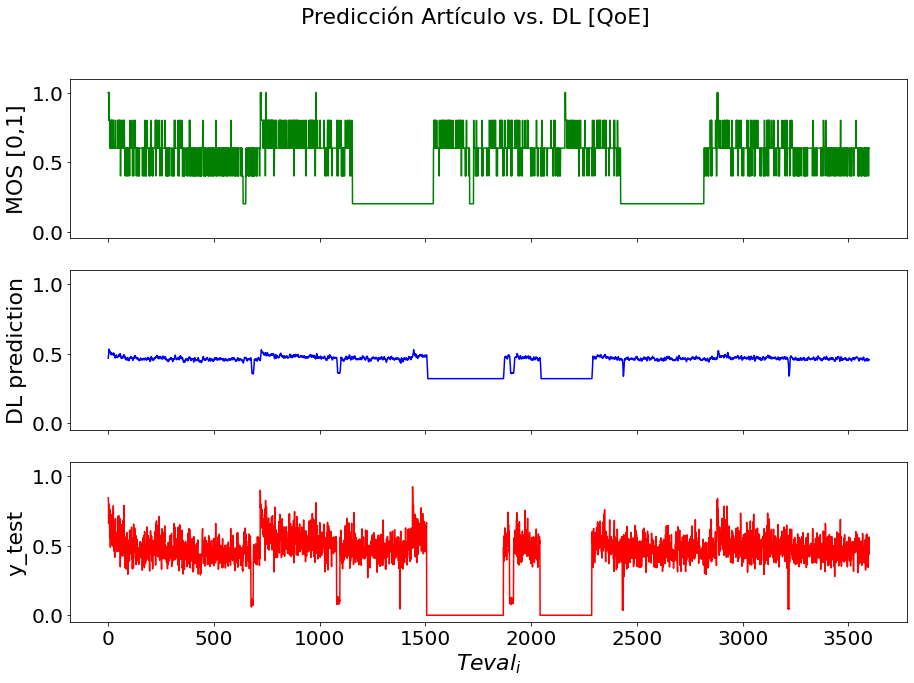

In [45]:
fig2, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción Artículo vs. DL [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax1.plot(yhat2,c='g')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('MOS [0,1]', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(yhat_QoE,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL prediction', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoE,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-comparisonPaperDLYtestQoE.png', format='png',bbox_inches='tight')

plt.show()

          yhat    y_test      diff
0     0.468762  0.845081  0.376319
1     0.485534  0.813059  0.327525
2     0.504242  0.660434  0.156192
3     0.512542  0.800199  0.287657
4     0.533659  0.695017  0.161358
...        ...       ...       ...
3594  0.456190  0.344773  0.111416
3595  0.453276  0.557016  0.103739
3596  0.457816  0.436116  0.021700
3597  0.456107  0.456852  0.000745
3598  0.458518  0.560795  0.102277

[3599 rows x 3 columns]


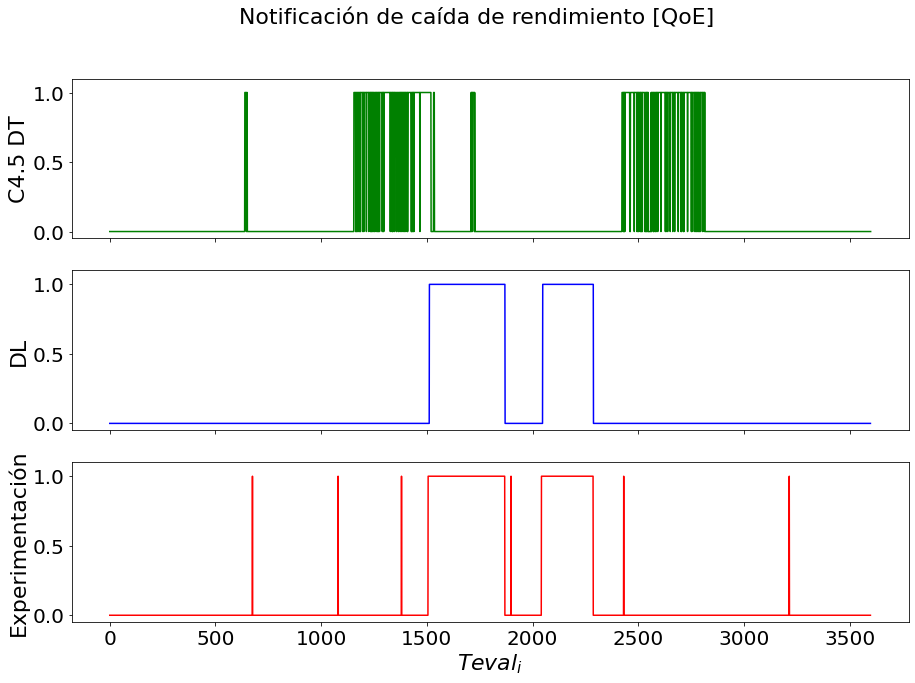

In [46]:
res_QoE = pd.DataFrame()
res_QoE['yhat'] = yhat_QoE.ravel()
res_QoE['y_test'] = y_test_QoE
res_QoE['diff'] = abs(res_QoE['yhat']-res_QoE['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoE)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoE['yhat'].shape[0]):
    #print([res_QoE['yhat'][i], res_QoE['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoE['yhat'][i] < res_QoE['y_test'][i-1]*th or res_QoE['yhat'][i] == res_QoE['yhat'][i-1] or res_QoE['yhat'][i] <= 0.3):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoE['y_test'][i] < res_QoE['y_test'][i-1]*th or res_QoE['y_test'][i] == res_QoE['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax1.plot(notif_paper,c='g')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('C4.5 DT', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(x,notif2,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('Experimentación', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-NotificationsQoE.png', format='png',bbox_inches='tight')

plt.show()


In [47]:
from sklearn.metrics import confusion_matrix, classification_report
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 2983
FP: 2
FN: 18
TP: 596
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2985
           1       1.00      0.97      0.98       614

    accuracy                           0.99      3599
   macro avg       1.00      0.99      0.99      3599
weighted avg       0.99      0.99      0.99      3599



In [48]:


notif_paper2 = notif_paper.pop()



tn, fp, fn, tp = confusion_matrix(notif2, notif_paper).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif_paper))

TN: 2354
FP: 631
FN: 580
TP: 34
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      2985
           1       0.05      0.06      0.05       614

    accuracy                           0.66      3599
   macro avg       0.43      0.42      0.42      3599
weighted avg       0.67      0.66      0.67      3599



In [49]:
print('************Diferencias Testing [QoE] **************')
print(max(res_QoE['diff']))
#print(min(res_QoE['diff']))
print(sum(res_QoE['diff'])/len(res_QoE))
print()

************Diferencias Testing [QoE] **************
0.4911729693412781
0.11495860255090459



In [50]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QoI, y_QoI = split_sequence(df['QoI'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X[i], y[i])

In [51]:
n_features = 1
X_QoI = X_QoI.reshape((X_QoI.shape[0], X_QoI.shape[1], n_features))
#print(X_QoI)
# define model
model_QoI = Sequential()
model_QoI.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoI.add(Dense(1))
model_QoI.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoI, X_test_QoI, y_train_QoI, y_test_QoI = train_test_split(X_QoI, y_QoI, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoI = model_QoI.fit(X_train_QoI, y_train_QoI, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoI = model_QoI.predict(X_test_QoI, verbose=0)
print([yhat_QoI,y_test_QoI])

Epoch 1/150
2/2 [==============================] - 0s 37ms/step - loss: 0.6164
Epoch 2/150
2/2 [==============================] - 0s 25ms/step - loss: 0.5292
Epoch 3/150
2/2 [==============================] - 0s 32ms/step - loss: 0.4544
Epoch 4/150
2/2 [==============================] - 0s 23ms/step - loss: 0.3905
Epoch 5/150
2/2 [==============================] - 0s 24ms/step - loss: 0.3368
Epoch 6/150
2/2 [==============================] - 0s 18ms/step - loss: 0.2909
Epoch 7/150
2/2 [==============================] - 0s 23ms/step - loss: 0.2517
Epoch 8/150
2/2 [==============================] - 0s 18ms/step - loss: 0.2190
Epoch 9/150
2/2 [==============================] - 0s 21ms/step - loss: 0.1912
Epoch 10/150
2/2 [==============================] - 0s 22ms/step - loss: 0.1675
Epoch 11/150
2/2 [==============================] - 0s 20ms/step - loss: 0.1471
Epoch 12/150
2/2 [==============================] - 0s 28ms/step - loss: 0.1304
Epoch 13/150
2/2 [==============================]

dict_keys(['loss'])


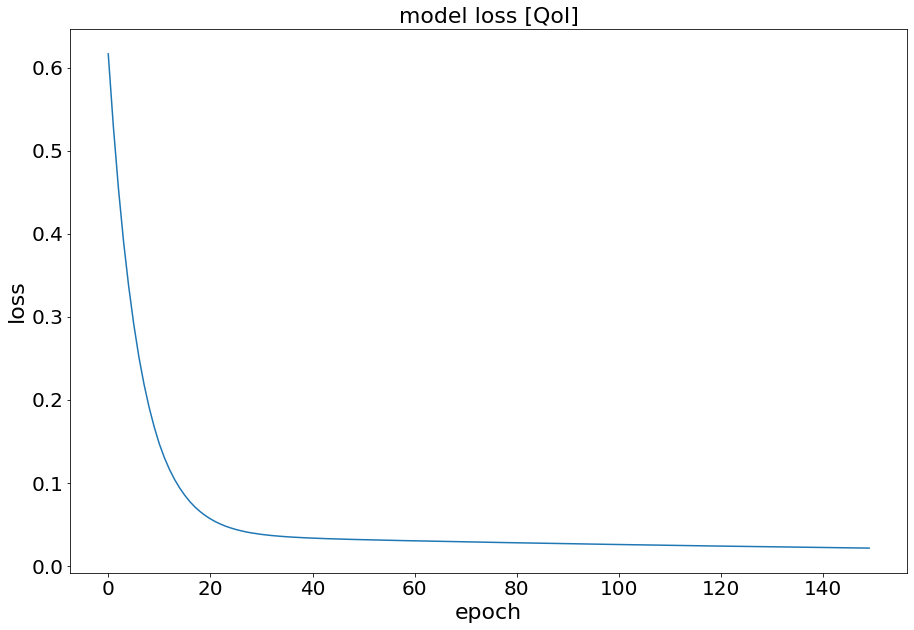

In [52]:
# list all data in history
print(history_QoI.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoI.history['loss'])
plt.title('model loss [QoI]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-model_QoI_loss-mse.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

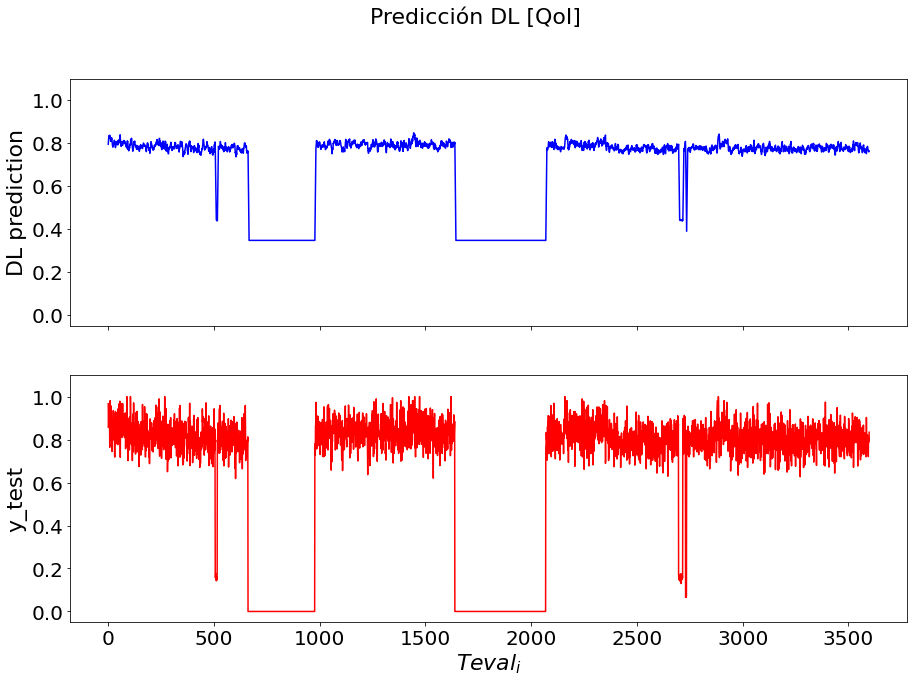

In [53]:
fig2, ( (ax2), (ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción DL [QoI]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax2.plot(yhat_QoI,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL prediction', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoI,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-comparisonPaperDLYtestQoI.png', format='png',bbox_inches='tight')

plt.show()

In [54]:
print('R2 Score [QoI]: '+str(r2_score(y_test_QoI, yhat_QoI)))

R2 Score [QoI]: 0.7232433167639809


          yhat    y_test      diff
0     0.794728  0.966711  0.171983
1     0.813419  0.856230  0.042811
2     0.822315  0.870640  0.048326
3     0.821771  0.966711  0.144940
4     0.835381  0.961171  0.125790
...        ...       ...       ...
3594  0.762271  0.720848  0.041424
3595  0.761864  0.799322  0.037458
3596  0.759081  0.810954  0.051873
3597  0.760666  0.789392  0.028727
3598  0.763050  0.834075  0.071024

[3599 rows x 3 columns]


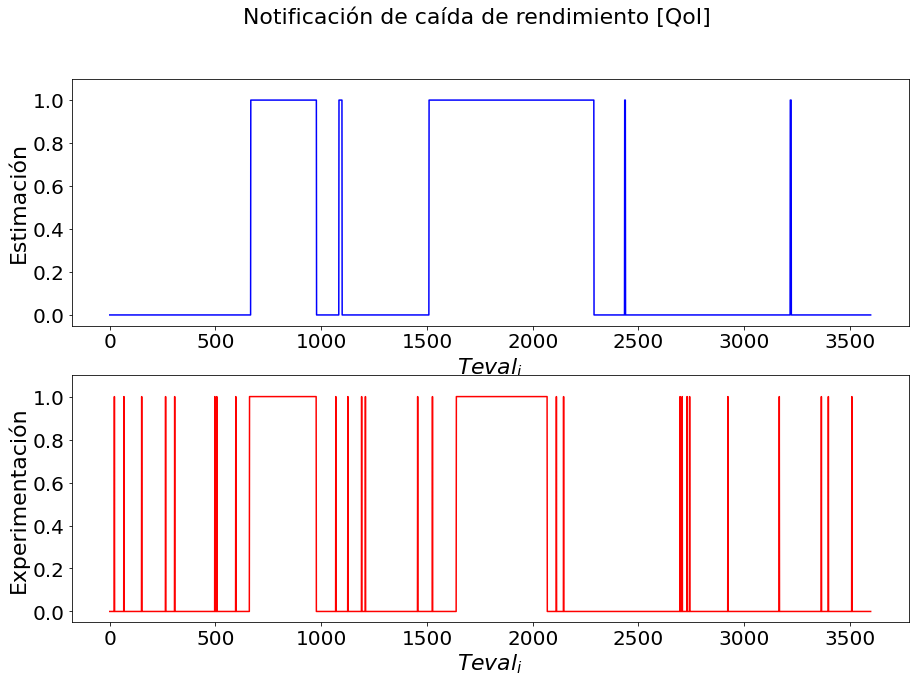

In [55]:
res_QoI = pd.DataFrame()
res_QoI['yhat'] = yhat_QoI.ravel()
res_QoI['y_test'] = y_test_QoI
res_QoI['diff'] = abs(res_QoI['yhat']-res_QoI['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoI)

notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoI['yhat'].shape[0]):
    #print([res_QoI['yhat'][i], res_QoI['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoI['yhat'][i] < res_QoI['y_test'][i-1]*th or res_QoI['yhat'][i] == res_QoI['yhat'][i-1] or res_QoE['yhat'][i] <= 0.4):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoI['y_test'][i] < res_QoI['y_test'][i-1]*th or res_QoI['y_test'][i] == res_QoI['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoI]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-NotificationsQoI.png', format='png',bbox_inches='tight')

plt.show()


In [56]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 2456
FP: 372
FN: 28
TP: 743
              precision    recall  f1-score   support

           0       0.99      0.87      0.92      2828
           1       0.67      0.96      0.79       771

    accuracy                           0.89      3599
   macro avg       0.83      0.92      0.86      3599
weighted avg       0.92      0.89      0.90      3599



In [57]:
res_QoI = pd.DataFrame()
res_QoI['yhat'] = yhat_QoI.ravel()
res_QoI['y_test'] = y_test_QoI
res_QoI['diff'] = abs(res_QoI['yhat']-res_QoI['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoI)

          yhat    y_test      diff
0     0.794728  0.966711  0.171983
1     0.813419  0.856230  0.042811
2     0.822315  0.870640  0.048326
3     0.821771  0.966711  0.144940
4     0.835381  0.961171  0.125790
...        ...       ...       ...
3594  0.762271  0.720848  0.041424
3595  0.761864  0.799322  0.037458
3596  0.759081  0.810954  0.051873
3597  0.760666  0.789392  0.028727
3598  0.763050  0.834075  0.071024

[3599 rows x 3 columns]


In [58]:
print('************Diferencias Testing [QoI] **************')
print(max(res_QoI['diff']))
#print(min(res_QoI['diff']))
print(sum(res_QoI['diff'])/len(res_QoI))
print()

************Diferencias Testing [QoI] **************
0.80265212059021
0.12293366277409759



In [59]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QoD, y_QoD = split_sequence(df['QoD'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X_QoD[i], y_QoD[i])

In [60]:
n_features = 1
X_QoD = X_QoD.reshape((X_QoD.shape[0], X_QoD.shape[1], n_features))
#print(X_QoD)
# define model
model_QoD = Sequential()
model_QoD.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoD.add(Dense(1))
model_QoD.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoD, X_test_QoD, y_train_QoD, y_test_QoD = train_test_split(X_QoD, y_QoD, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoD = model_QoD.fit(X_train_QoD, y_train_QoD, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoD = model_QoD.predict(X_test_QoD, verbose=0)
#print([yhat_QoD,y_test_QoD])


Epoch 1/150
2/2 [==============================] - 0s 32ms/step - loss: 0.2471
Epoch 2/150
2/2 [==============================] - 0s 24ms/step - loss: 0.2181
Epoch 3/150
2/2 [==============================] - 0s 30ms/step - loss: 0.1928
Epoch 4/150
2/2 [==============================] - 0s 24ms/step - loss: 0.1709
Epoch 5/150
2/2 [==============================] - 0s 21ms/step - loss: 0.1520
Epoch 6/150
2/2 [==============================] - 0s 18ms/step - loss: 0.1356
Epoch 7/150
2/2 [==============================] - 0s 34ms/step - loss: 0.1213
Epoch 8/150
2/2 [==============================] - 0s 32ms/step - loss: 0.1084
Epoch 9/150
2/2 [==============================] - 0s 26ms/step - loss: 0.0971
Epoch 10/150
2/2 [==============================] - 0s 31ms/step - loss: 0.0874
Epoch 11/150
2/2 [==============================] - 0s 35ms/step - loss: 0.0789
Epoch 12/150
2/2 [==============================] - 0s 31ms/step - loss: 0.0715
Epoch 13/150
2/2 [==============================]

In [61]:
yhat_QoD = model_QoD.predict(X_test_QoD, verbose=0)
print([yhat_QoD,y_test_QoD])

[array([[0.46515852],
       [0.46104616],
       [0.4552798 ],
       ...,
       [0.48875543],
       [0.4922934 ],
       [0.49729428]], dtype=float32), array([0.40589295, 0.53950617, 0.51138782, ..., 0.57053041, 0.53435826,
       0.54837743])]


dict_keys(['loss'])


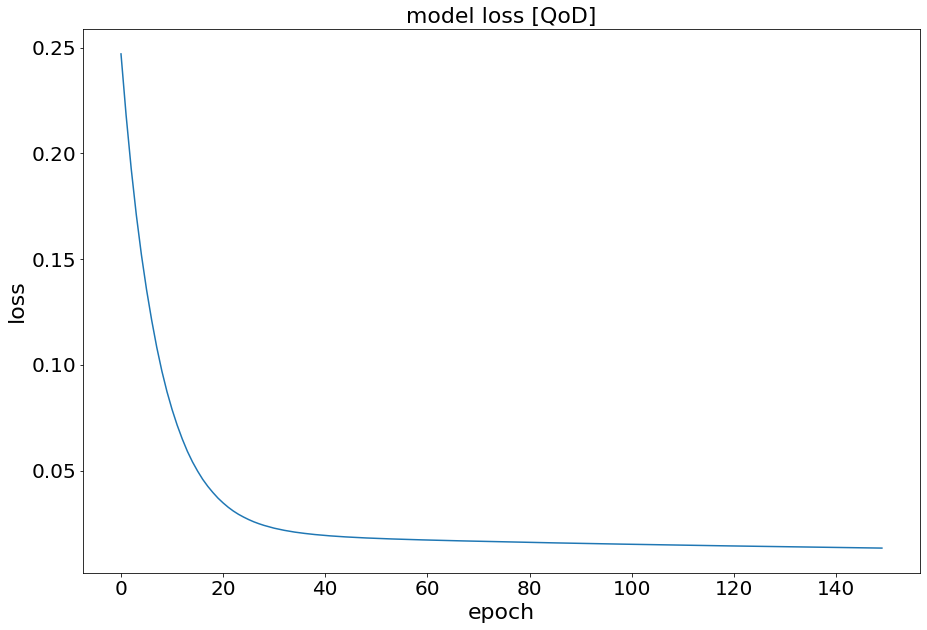

In [62]:
# list all data in history
print(history_QoD.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoD.history['loss'])
plt.title('model loss [QoD]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-model_QoD_loss-mean_squared_error.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

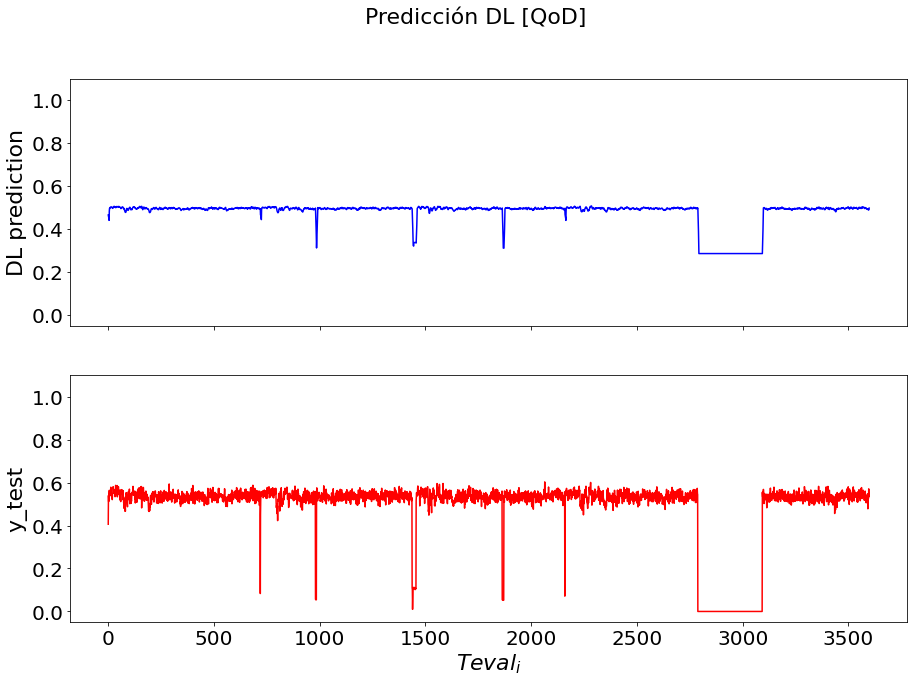

In [63]:
fig2, ((ax2), (ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción DL [QoD]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)


ax2.plot(yhat_QoD,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL prediction', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoD,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-comparisonPaperDLYtestQoD.png', format='png',bbox_inches='tight')

plt.show()

In [64]:
print('R2 Score: '+str(r2_score(y_test_QoD, yhat_QoD)))

R2 Score: 0.5892622304583323


          yhat    y_test      diff
0     0.465159  0.405893  0.059266
1     0.461046  0.539506  0.078460
2     0.455280  0.511388  0.056108
3     0.449353  0.542577  0.093224
4     0.440218  0.524009  0.083792
...        ...       ...       ...
3594  0.492223  0.528148  0.035925
3595  0.491194  0.526532  0.035338
3596  0.488755  0.570530  0.081775
3597  0.492293  0.534358  0.042065
3598  0.497294  0.548377  0.051083

[3599 rows x 3 columns]


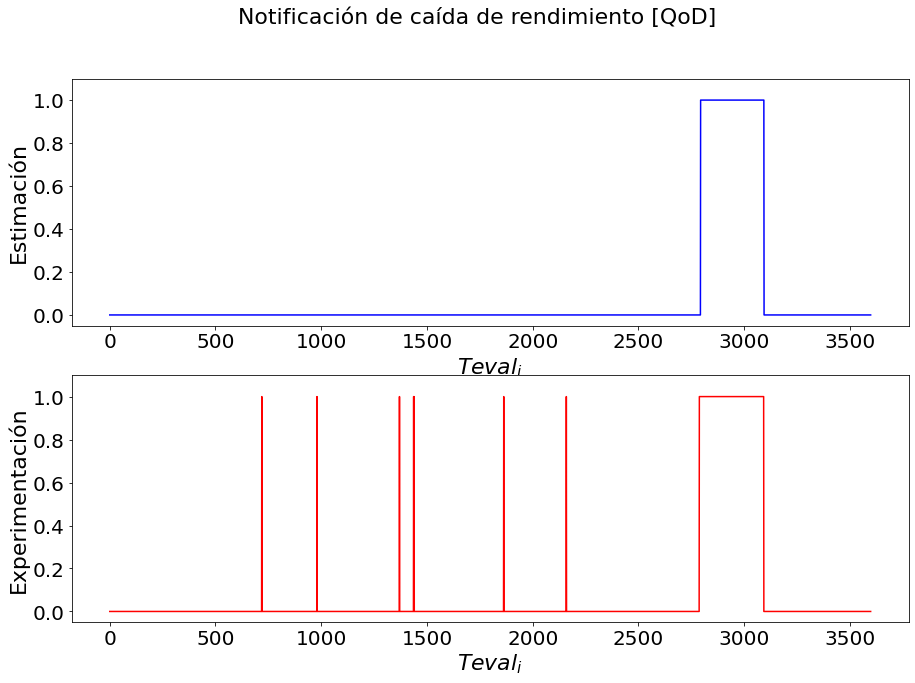

In [65]:
res_QoD = pd.DataFrame()
res_QoD['yhat'] = yhat_QoD.ravel()
res_QoD['y_test'] = y_test_QoD
res_QoD['diff'] = abs(res_QoD['yhat']-res_QoD['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoD)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoD['yhat'].shape[0]):
    #print([res_QoD['yhat'][i], res_QoD['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoD['yhat'][i] < res_QoD['y_test'][i-1]*th or res_QoD['yhat'][i] == res_QoD['yhat'][i-1]):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoD['y_test'][i] < res_QoD['y_test'][i-1]*th or res_QoD['y_test'][i] == res_QoD['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoD]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-NotificationsQoD.png', format='png',bbox_inches='tight')

plt.show()

In [66]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 3286
FP: 1
FN: 13
TP: 299
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3287
           1       1.00      0.96      0.98       312

    accuracy                           1.00      3599
   macro avg       1.00      0.98      0.99      3599
weighted avg       1.00      1.00      1.00      3599



In [67]:
print('************Diferencias Testing [QoD] **************')
print(max(res_QoD['diff']))
#print(min(res_QoD['diff']))
print(sum(res_QoD['diff'])/len(res_QoD))
print()

************Diferencias Testing [QoD] **************
0.4969376027584076
0.06432270707384098



In [68]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QC, y_QC = split_sequence(df['QC'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X_QC[i], y_QC[i])

In [69]:
n_features = 1
X_QC = X_QC.reshape((X_QC.shape[0], X_QC.shape[1], n_features))
#print(X_QC)
# define model
model_QC = Sequential()
model_QC.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QC.add(Dense(1))
model_QC.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QC, X_test_QC, y_train_QC, y_test_QC = train_test_split(X_QC, y_QC, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QC = model_QC.fit(X_train_QC, y_train_QC, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QC = model_QC.predict(X_test_QC, verbose=0)
#print([yhat_QC,y_test_QC])


Epoch 1/150
2/2 [==============================] - 0s 20ms/step - loss: 0.1374
Epoch 2/150
2/2 [==============================] - 0s 23ms/step - loss: 0.1240
Epoch 3/150
2/2 [==============================] - 0s 24ms/step - loss: 0.1123
Epoch 4/150
2/2 [==============================] - 0s 27ms/step - loss: 0.1021
Epoch 5/150
2/2 [==============================] - 0s 17ms/step - loss: 0.0930
Epoch 6/150
2/2 [==============================] - 0s 13ms/step - loss: 0.0848
Epoch 7/150
2/2 [==============================] - 0s 19ms/step - loss: 0.0775
Epoch 8/150
2/2 [==============================] - 0s 20ms/step - loss: 0.0711
Epoch 9/150
2/2 [==============================] - 0s 16ms/step - loss: 0.0651
Epoch 10/150
2/2 [==============================] - 0s 23ms/step - loss: 0.0600
Epoch 11/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0554
Epoch 12/150
2/2 [==============================] - 0s 11ms/step - loss: 0.0513
Epoch 13/150
2/2 [==============================]

In [70]:
yhat_QC = model_QC.predict(X_test_QC, verbose=0)
print([yhat_QC,y_test_QC])

[array([[0.38225144],
       [0.39640307],
       [0.40670678],
       ...,
       [0.36359164],
       [0.3621258 ],
       [0.36331898]], dtype=float32), array([0.67019948, 0.68704342, 0.55937971, ..., 0.35313716, 0.37271052,
       0.48629423])]


dict_keys(['loss'])


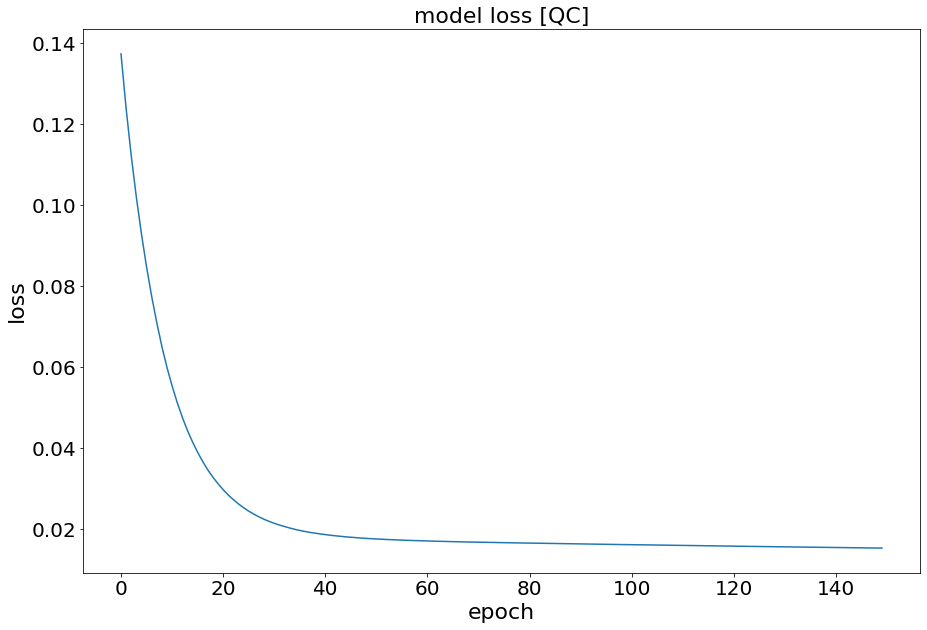

In [71]:
# list all data in history
print(history_QC.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QC.history['loss'])
plt.title('model loss [QC]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-model_QC_loss-mean_squared_error.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

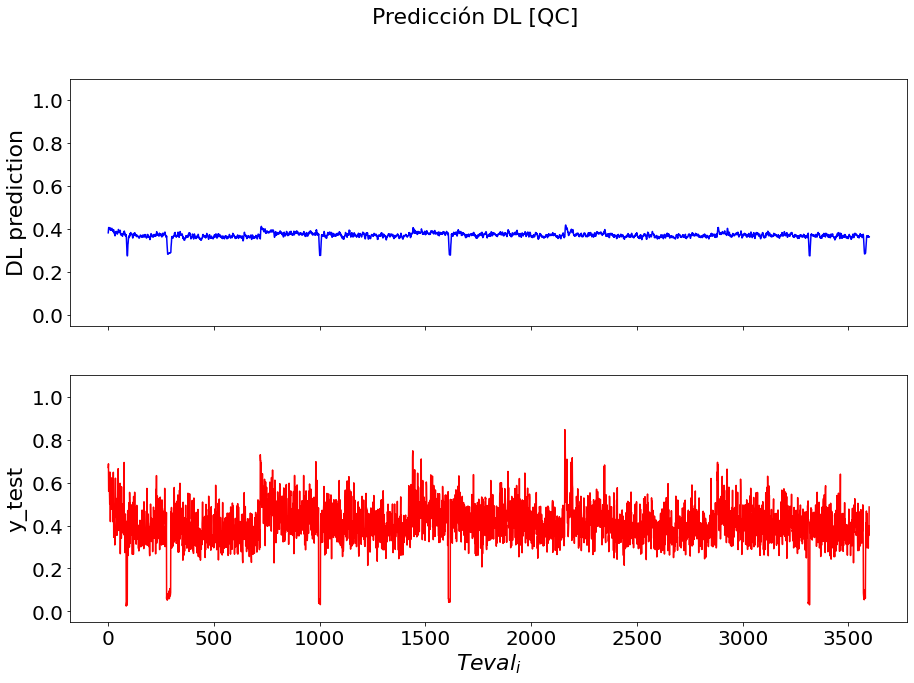

In [72]:
fig2, ( (ax2), (ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción DL [QC]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)


ax2.plot(yhat_QC,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL prediction', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QC,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-comparisonPaperDLYtestQC.png', format='png',bbox_inches='tight')

plt.show()

In [73]:
print('R2 Score: '+str(r2_score(y_test_QC, yhat_QC)))

R2 Score: -0.012204076963416854


          yhat    y_test      diff
0     0.382251  0.670199  0.287948
1     0.396403  0.687043  0.290640
2     0.406707  0.559380  0.152673
3     0.405681  0.564117  0.158436
4     0.406709  0.602454  0.195745
...        ...       ...       ...
3594  0.367499  0.294726  0.072773
3595  0.361412  0.399296  0.037884
3596  0.363592  0.353137  0.010454
3597  0.362126  0.372711  0.010585
3598  0.363319  0.486294  0.122975

[3599 rows x 3 columns]


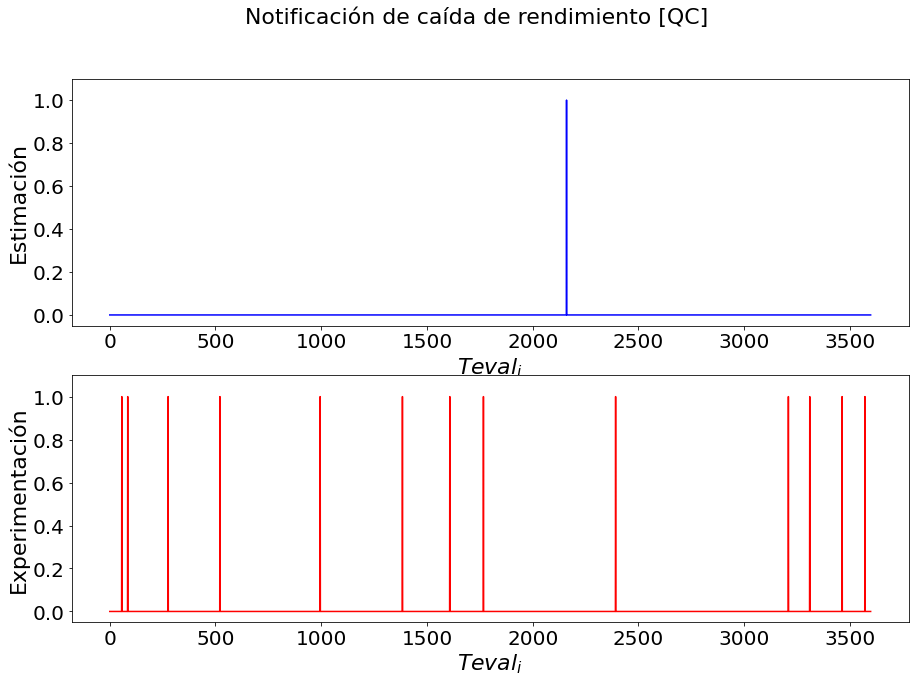

In [74]:
res_QC = pd.DataFrame()
res_QC['yhat'] = yhat_QC.ravel()
res_QC['y_test'] = y_test_QC
res_QC['diff'] = abs(res_QC['yhat']-res_QC['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QC)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QC['yhat'].shape[0]):
    #print([res_QC['yhat'][i], res_QC['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QC['yhat'][i] < res_QC['y_test'][i-1]*th or res_QC['yhat'][i] == res_QC['yhat'][i-1] ):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QC['y_test'][i] < res_QC['y_test'][i-1]*th or res_QC['y_test'][i] == res_QC['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QC]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-NotificationsQC.png', format='png',bbox_inches='tight')

plt.show()

In [75]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 3585
FP: 1
FN: 13
TP: 0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3586
           1       0.00      0.00      0.00        13

    accuracy                           1.00      3599
   macro avg       0.50      0.50      0.50      3599
weighted avg       0.99      1.00      0.99      3599

